# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, RobustScaler, MinMaxScaler, PowerTransformer
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from scipy import stats
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
import warnings
warnings.filterwarnings('ignore')
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [ ]:
print("# 3. MEMUAT DATASET")
file_path = '/content/drive/MyDrive/dicoding/ML pemula/climate_change_impact_on_agriculture_2024.csv'
df = pd.read_csv(file_path)

print("Melihat 5 baris pertama dataset:")
print(df.head())

print("\nInformasi Dataset:")
print(df.info())

print("\nStatistik Deskriptif:")
print(df.describe())

# 3. MEMUAT DATASET
Melihat 5 baris pertama dataset:
   Year Country         Region  Crop_Type  Average_Temperature_C  \
0  2001   India    West Bengal       Corn                   1.55   
1  2024   China          North       Corn                   3.23   
2  2001  France  Ile-de-France      Wheat                  21.11   
3  2001  Canada       Prairies     Coffee                  27.85   
4  1998   India     Tamil Nadu  Sugarcane                   2.19   

   Total_Precipitation_mm  CO2_Emissions_MT  Crop_Yield_MT_per_HA  \
0                  447.06             15.22                 1.737   
1                 2913.57             29.82                 1.737   
2                 1301.74             25.75                 1.719   
3                 1154.36             13.91                 3.890   
4                 1627.48             11.81                 1.080   

   Extreme_Weather_Events  Irrigation_Access_%  Pesticide_Use_KG_per_HA  \
0                       8                14.54  

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [ ]:
# Memahami Struktur Data
print("Ukuran Dataset:", df.shape)
print("\nTipe Data di Setiap Kolom:")
print(df.dtypes)

Ukuran Dataset: (10000, 15)

Tipe Data di Setiap Kolom:
Year                             int64
Country                         object
Region                          object
Crop_Type                       object
Average_Temperature_C          float64
Total_Precipitation_mm         float64
CO2_Emissions_MT               float64
Crop_Yield_MT_per_HA           float64
Extreme_Weather_Events           int64
Irrigation_Access_%            float64
Pesticide_Use_KG_per_HA        float64
Fertilizer_Use_KG_per_HA       float64
Soil_Health_Index              float64
Adaptation_Strategies           object
Economic_Impact_Million_USD    float64
dtype: object


In [ ]:
# Memeriksa nilai yang hilang (missing values)
print("\nJumlah nilai yang hilang di setiap kolom:")
missing_values = df.isnull().sum()
print(missing_values)
print(f"Total nilai yang hilang: {missing_values.sum()}")


Jumlah nilai yang hilang di setiap kolom:
Year                           0
Country                        0
Region                         0
Crop_Type                      0
Average_Temperature_C          0
Total_Precipitation_mm         0
CO2_Emissions_MT               0
Crop_Yield_MT_per_HA           0
Extreme_Weather_Events         0
Irrigation_Access_%            0
Pesticide_Use_KG_per_HA        0
Fertilizer_Use_KG_per_HA       0
Soil_Health_Index              0
Adaptation_Strategies          0
Economic_Impact_Million_USD    0
dtype: int64
Total nilai yang hilang: 0


In [ ]:
# Identifikasi kolom kategorikal dan numerik
categorical_cols = ['Country', 'Region', 'Crop_Type', 'Adaptation_Strategies']
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns


Statistik Deskriptif untuk Variabel Numerik:
               Year  Average_Temperature_C  Total_Precipitation_mm  \
count  10000.000000           10000.000000            10000.000000   
mean    2007.088700              15.241299             1611.663834   
std       10.084245              11.466955              805.016815   
min     1990.000000              -4.990000              200.150000   
25%     1999.000000               5.430000              925.697500   
50%     2007.000000              15.175000             1611.160000   
75%     2016.000000              25.340000             2306.997500   
max     2024.000000              35.000000             2999.670000   

       CO2_Emissions_MT  Crop_Yield_MT_per_HA  Extreme_Weather_Events  \
count      10000.000000          10000.000000            10000.000000   
mean          15.246608              2.240017                4.980900   
std            8.589423              0.998342                3.165808   
min            0.500000        

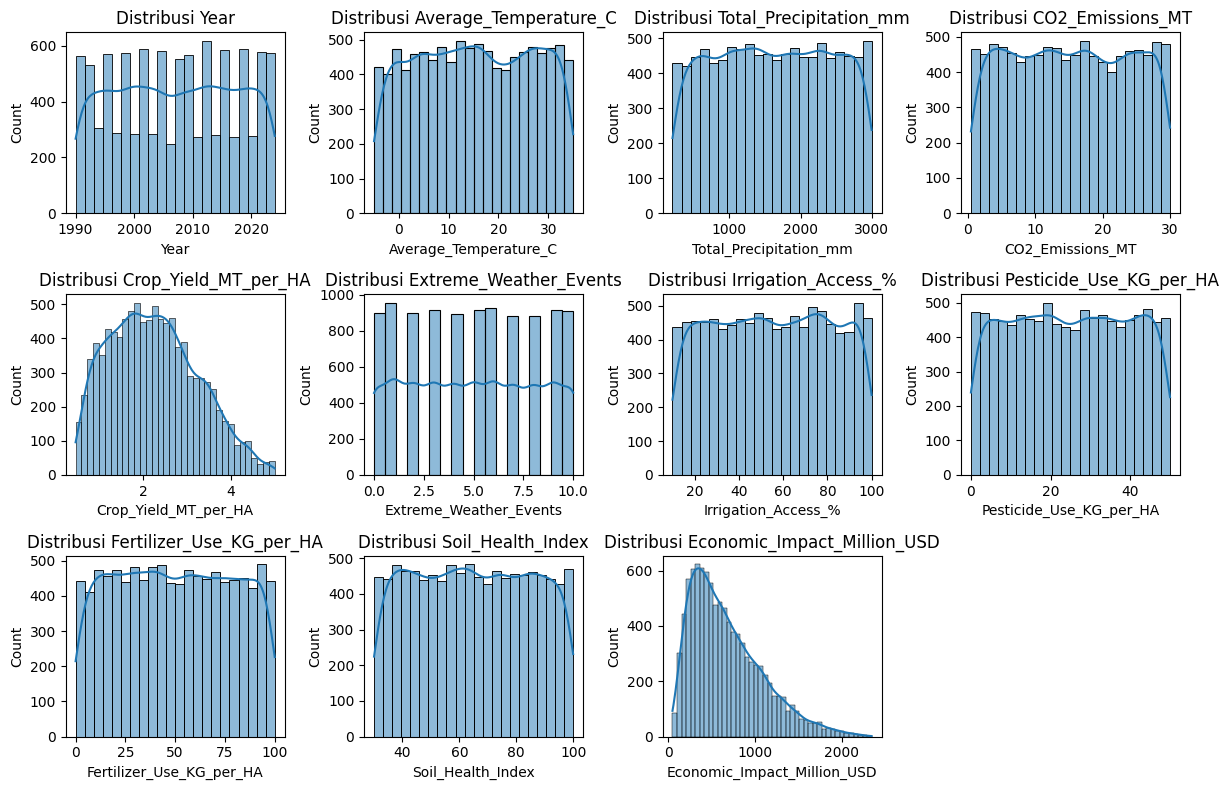

In [ ]:
# Analisis Distribusi Variabel Numerik
print("\nStatistik Deskriptif untuk Variabel Numerik:")
print(df[numeric_cols].describe())

# Visualisasi distribusi variabel numerik
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 4, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribusi {col}')
    plt.tight_layout()
plt.show()


Distribusi Variabel Kategorikal:

Distribusi Country:
Country
Australia    1032
USA          1032
China        1031
Nigeria      1029
India        1025
Name: count, dtype: int64
Jumlah kategori unik: 10

Distribusi Region:
Region
South        754
Northeast    752
North        524
Central      466
Punjab       288
Name: count, dtype: int64
Jumlah kategori unik: 34

Distribusi Crop_Type:
Crop_Type
Wheat         1047
Cotton        1044
Vegetables    1036
Corn          1022
Rice          1022
Name: count, dtype: int64
Jumlah kategori unik: 10

Distribusi Adaptation_Strategies:
Adaptation_Strategies
Water Management           2049
No Adaptation              2024
Drought-resistant Crops    1995
Organic Farming            1975
Crop Rotation              1957
Name: count, dtype: int64
Jumlah kategori unik: 5


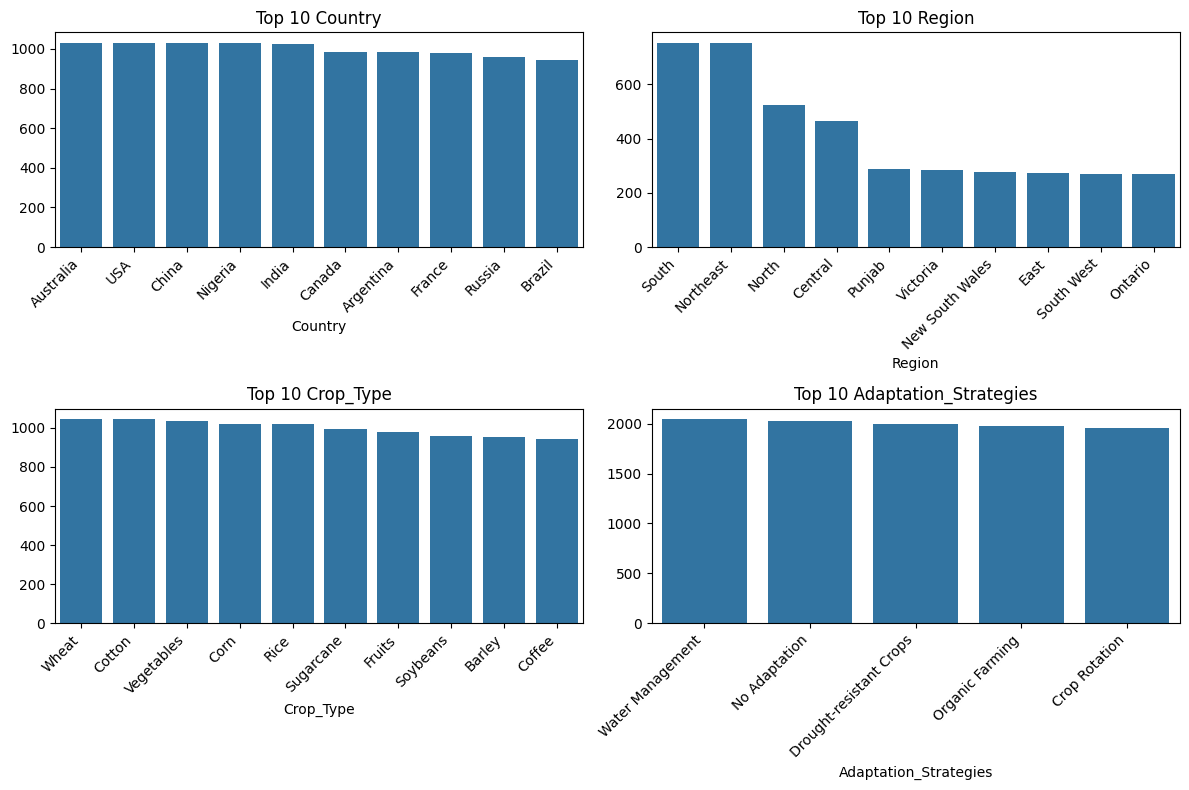

In [ ]:
# Distribusi variabel kategorikal
print("\nDistribusi Variabel Kategorikal:")
for col in categorical_cols:
    print(f"\nDistribusi {col}:")
    value_counts = df[col].value_counts()
    print(value_counts.head())
    print(f"Jumlah kategori unik: {len(value_counts)}")

# Visualisasi variabel kategorikal
plt.figure(figsize=(12, 8))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 2, i)
    value_counts = df[col].value_counts().head(10)  # Top 10 categories
    sns.barplot(x=value_counts.index, y=value_counts.values)
    plt.title(f'Top 10 {col}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
plt.show()

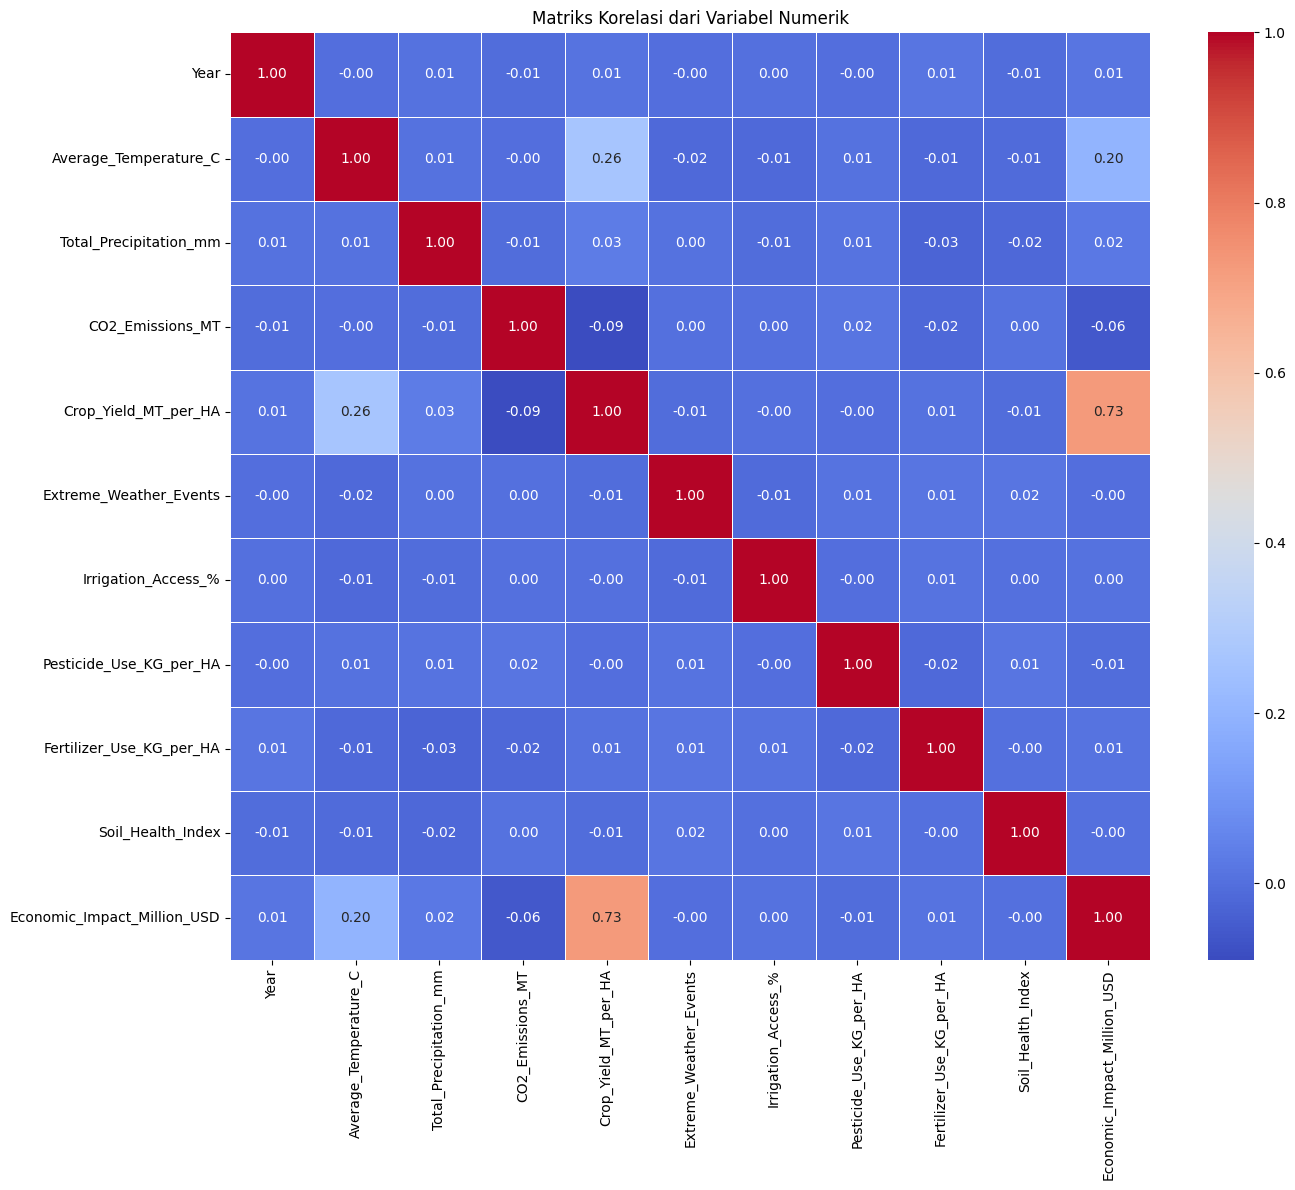

<Figure size 1400x1000 with 0 Axes>

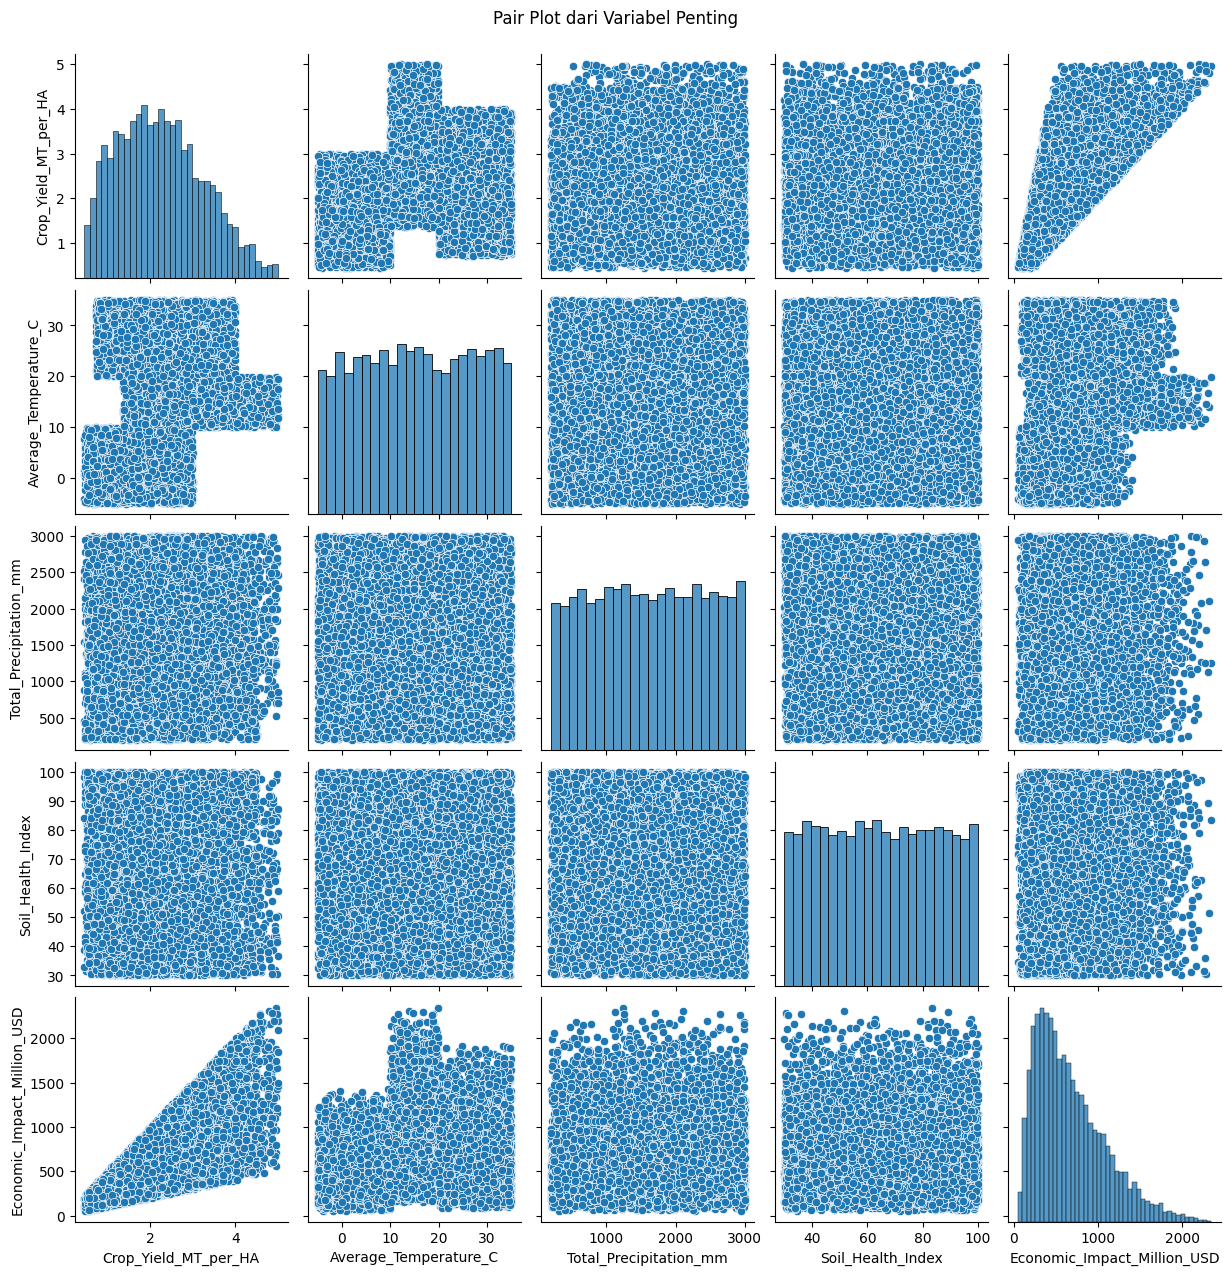

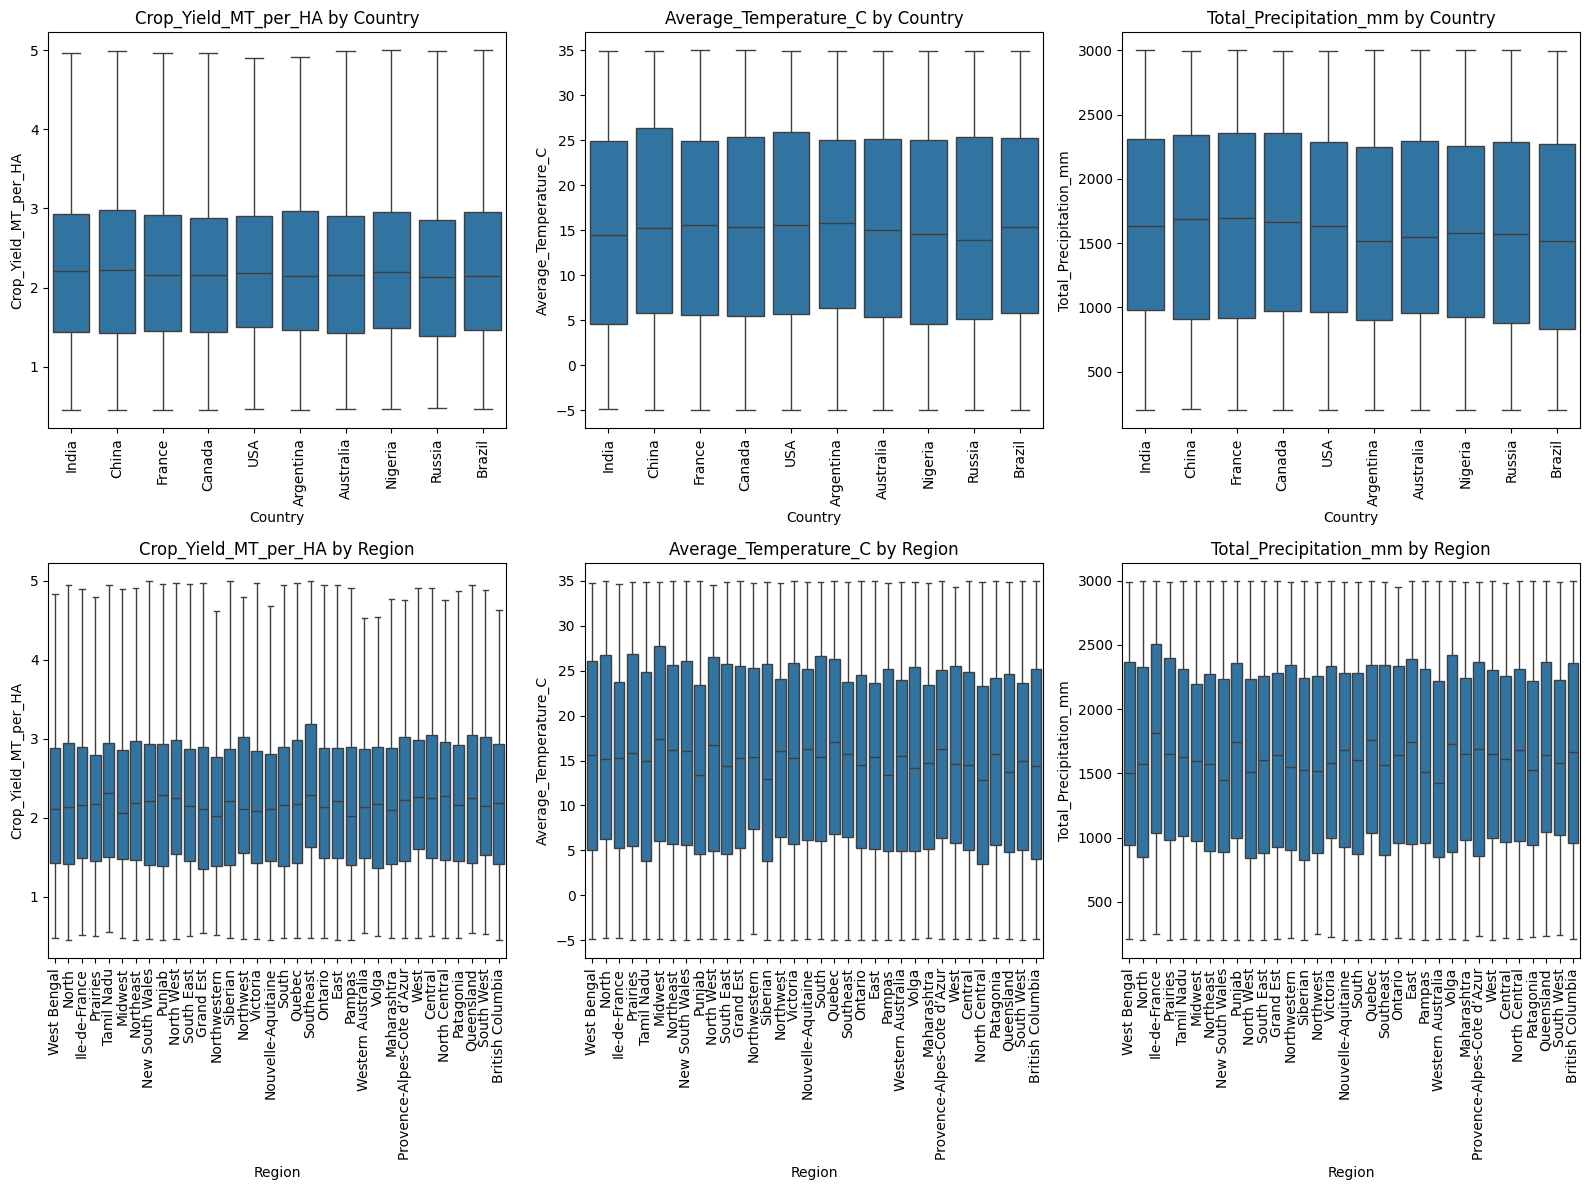

In [ ]:
# 5. Analisis Korelasi
plt.figure(figsize=(14, 12))
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Matriks Korelasi dari Variabel Numerik")
plt.tight_layout()
plt.show()

# 6. Pair Plots untuk variabel yang mungkin memiliki hubungan penting
important_vars = ['Crop_Yield_MT_per_HA', 'Average_Temperature_C', 'Total_Precipitation_mm', 'Soil_Health_Index', 'Economic_Impact_Million_USD']
plt.figure(figsize=(14, 10))
sns.pairplot(df[important_vars])
plt.suptitle("Pair Plot dari Variabel Penting", y=1.02)
plt.show()

# 7. Analisis relasi antar variabel kategorikal dan numerik
plt.figure(figsize=(16, 12))
for i, cat_col in enumerate(categorical_cols[:2], 1):  # Hanya dua kategori pertama untuk kesederhanaan
    for j, num_col in enumerate(important_vars[:3], 1):
        plt.subplot(2, 3, (i-1)*3 + j)
        sns.boxplot(x=cat_col, y=num_col, data=df, showfliers=False)
        plt.title(f'{num_col} by {cat_col}')
        plt.xticks(rotation=90)
        plt.tight_layout()
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [ ]:
# **5. Data Preprocessing**
print("\n# 5. DATA PREPROCESSING")

# STRATEGI UNTUK MENINGKATKAN SILHOUETTE SCORE:
# 1. Mempertahankan data sebanyak mungkin (tidak menghapus outlier)
# 2. Menerapkan transformasi yang lebih efektif
# 3. Membuat fitur baru yang lebih jelas memisahkan kelompok

# A. Proses Transformasi Data dan Pembuatan Fitur Baru
print("\nA. Menerapkan transformasi data dan membuat fitur baru")

# Membuat salinan dataset
df_transformed = df.copy()

# 1. Log transform untuk distribusi condong/skewed
skewed_features = ['CO2_Emissions_MT', 'Total_Precipitation_mm', 'Economic_Impact_Million_USD']
for feature in skewed_features:
    # Tambahkan konstanta kecil jika ada nilai 0
    min_val = df_transformed[feature].min()
    if min_val <= 0:
        df_transformed[feature] = df_transformed[feature] - min_val + 1

    # Terapkan log transform
    df_transformed[feature+'_Log'] = np.log1p(df_transformed[feature])
    print(f"  Log transform diterapkan pada {feature}")

# 2. Membuat rasio fitur baru
df_transformed['Temp_Precip_Ratio'] = df_transformed['Average_Temperature_C'] / np.log1p(df_transformed['Total_Precipitation_mm'])
df_transformed['Yield_Temp_Ratio'] = df_transformed['Crop_Yield_MT_per_HA'] / df_transformed['Average_Temperature_C']
df_transformed['CO2_Temp_Ratio'] = np.log1p(df_transformed['CO2_Emissions_MT']) / df_transformed['Average_Temperature_C']
df_transformed['EconomicImpact_per_CO2'] = np.log1p(df_transformed['Economic_Impact_Million_USD']) / np.log1p(df_transformed['CO2_Emissions_MT'])

# 3. Fitur polynomial yang menangkap hubungan non-linear
df_transformed['Temp_Squared'] = df_transformed['Average_Temperature_C'] ** 2
df_transformed['Soil_Health_Squared'] = df_transformed['Soil_Health_Index'] ** 2

# 4. Efisiensi iklim dan dampak
df_transformed['Climate_Efficiency'] = df_transformed['Crop_Yield_MT_per_HA'] / (df_transformed['Average_Temperature_C'] * df_transformed['Total_Precipitation_mm'] / 1000)
df_transformed['Yield_per_CO2'] = df_transformed['Crop_Yield_MT_per_HA'] / np.log1p(df_transformed['CO2_Emissions_MT'])

# 5. Normalize extreme weather events based on region
region_weather_avg = df.groupby('Region')['Extreme_Weather_Events'].transform('mean')
df_transformed['Weather_Region_Norm'] = df['Extreme_Weather_Events'] / (region_weather_avg + 1)

# 6. Binning suhu yang lebih granular
temp_bins = [
    df['Average_Temperature_C'].min() - 0.1,
    15, 17, 19, 21, 23, 25, 27,
    df['Average_Temperature_C'].max() + 0.1
]
temp_labels = ['Very Cold', 'Cold', 'Cool', 'Mild', 'Moderate', 'Warm', 'Hot', 'Very Hot']
df_transformed['Temperature_Binned'] = pd.cut(df['Average_Temperature_C'], bins=temp_bins, labels=temp_labels)

# 7. Binning curah hujan
rain_bins = [
    df['Total_Precipitation_mm'].min() - 0.1,
    500, 800, 1100, 1400, 1700,
    df['Total_Precipitation_mm'].max() + 0.1
]
rain_labels = ['Very Dry', 'Dry', 'Moderate', 'Wet', 'Very Wet', 'Extremely Wet']
df_transformed['Precipitation_Binned'] = pd.cut(df['Total_Precipitation_mm'], bins=rain_bins, labels=rain_labels)

# 8. Membuat kategori climatic zone (kombinasi suhu dan curah hujan)
df_transformed['Climate_Zone'] = df_transformed['Temperature_Binned'].astype(str) + "-" + df_transformed['Precipitation_Binned'].astype(str)

print(f"Total fitur baru yang dibuat: {df_transformed.shape[1] - df.shape[1]}")
print("Fitur dataset setelah transformasi:", df_transformed.shape)


# 5. DATA PREPROCESSING

A. Menerapkan transformasi data dan membuat fitur baru
  Log transform diterapkan pada CO2_Emissions_MT
  Log transform diterapkan pada Total_Precipitation_mm
  Log transform diterapkan pada Economic_Impact_Million_USD
Total fitur baru yang dibuat: 15
Fitur dataset setelah transformasi: (10000, 30)


In [ ]:
# B. Menangani Data Kosong (Missing Values)
print("\nB. Menangani nilai yang hilang")
if df_transformed.isnull().sum().sum() > 0:
    print("  Terdapat nilai yang hilang, melakukan imputasi...")

    # Update categorical and numeric columns after transformation
    categorical_cols_all = df_transformed.select_dtypes(include=['object', 'category']).columns.tolist()
    numeric_cols_all = df_transformed.select_dtypes(include=['int64', 'float64']).columns.tolist()

    # Impute numerik dengan median per region dan crop type (lebih akurat)
    for col in numeric_cols_all:
        if df_transformed[col].isnull().sum() > 0:
            # Group by Region dan Crop Type untuk imputasi yang lebih akurat
            df_transformed[col] = df_transformed.groupby(['Region', 'Crop_Type'])[col].transform(
                lambda x: x.fillna(x.median() if not pd.isna(x.median()) else df_transformed[col].median())
            )

    # Impute kategorikal dengan modus dalam grup
    for col in categorical_cols_all:
        if df_transformed[col].isnull().sum() > 0:
            df_transformed[col] = df_transformed.groupby('Region')[col].transform(
                lambda x: x.fillna(x.mode()[0] if not x.mode().empty else "Unknown")
            )
else:
    print("  Tidak ada nilai yang hilang dalam dataset.")


B. Menangani nilai yang hilang
  Tidak ada nilai yang hilang dalam dataset.


In [ ]:
# C. Menghapus Data Duplikat
print("\nC. Menghapus data duplikat")
duplicate_count = df_transformed.duplicated().sum()
if duplicate_count > 0:
    print(f"  Menghapus {duplicate_count} data duplikat...")
    df_transformed.drop_duplicates(inplace=True)
    print(f"  Ukuran dataset setelah menghapus duplikat: {df_transformed.shape}")
else:
    print("  Tidak ada data duplikat dalam dataset.")


C. Menghapus data duplikat
  Tidak ada data duplikat dalam dataset.


In [ ]:
# Redefine numeric_cols_all here
numeric_cols_all = df_transformed.select_dtypes(include=['int64', 'float64']).columns.tolist()

# D. Deteksi dan Penanganan Outlier dengan Winsorization
print("\nD. Deteksi dan penanganan outlier dengan Winsorization")
for col in numeric_cols_all:
    # Apply Winsorization at 1% and 99% to preserve data
    lower_bound = np.percentile(df_transformed[col], 1)
    upper_bound = np.percentile(df_transformed[col], 99)

    # Count before winsorizing
    outlier_count = ((df_transformed[col] < lower_bound) | (df_transformed[col] > upper_bound)).sum()

    if outlier_count > 0:
        # Winsorize (cap) values at 1% and 99% boundaries
        df_transformed[col] = np.where(df_transformed[col] < lower_bound, lower_bound, df_transformed[col])
        df_transformed[col] = np.where(df_transformed[col] > upper_bound, upper_bound, df_transformed[col])
        print(f"  {col}: {outlier_count} outlier ditangani dengan Winsorization")


D. Deteksi dan penanganan outlier dengan Winsorization
  Average_Temperature_C: 195 outlier ditangani dengan Winsorization
  Total_Precipitation_mm: 200 outlier ditangani dengan Winsorization
  CO2_Emissions_MT: 197 outlier ditangani dengan Winsorization
  Crop_Yield_MT_per_HA: 195 outlier ditangani dengan Winsorization
  Irrigation_Access_%: 199 outlier ditangani dengan Winsorization
  Pesticide_Use_KG_per_HA: 197 outlier ditangani dengan Winsorization
  Fertilizer_Use_KG_per_HA: 199 outlier ditangani dengan Winsorization
  Soil_Health_Index: 198 outlier ditangani dengan Winsorization
  Economic_Impact_Million_USD: 200 outlier ditangani dengan Winsorization
  CO2_Emissions_MT_Log: 197 outlier ditangani dengan Winsorization
  Total_Precipitation_mm_Log: 200 outlier ditangani dengan Winsorization
  Economic_Impact_Million_USD_Log: 200 outlier ditangani dengan Winsorization
  Temp_Precip_Ratio: 200 outlier ditangani dengan Winsorization
  Yield_Temp_Ratio: 200 outlier ditangani dengan W

In [ ]:
# E. Encoding Data Kategorikal
print("\nE. Encoding data kategorikal")
categorical_cols_all = df_transformed.select_dtypes(include=['object', 'category']).columns.tolist()
encoders = {}

for col in categorical_cols_all:
    le = LabelEncoder()
    df_transformed[col + '_Encoded'] = le.fit_transform(df_transformed[col])
    encoders[col] = le
    print(f"  {col} -> {col}_Encoded")


E. Encoding data kategorikal
  Country -> Country_Encoded
  Region -> Region_Encoded
  Crop_Type -> Crop_Type_Encoded
  Adaptation_Strategies -> Adaptation_Strategies_Encoded
  Temperature_Binned -> Temperature_Binned_Encoded
  Precipitation_Binned -> Precipitation_Binned_Encoded
  Climate_Zone -> Climate_Zone_Encoded


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [ ]:
print("\n# 6. PEMBANGUNAN MODEL CLUSTERING")

# Gunakan semua fitur numerik dan kategorikal terenkode untuk clustering awal
numeric_features = df_transformed.select_dtypes(include=['int64', 'float64']).columns.tolist()
encoded_features = [col for col in df_transformed.columns if col.endswith('_Encoded')]

# Gunakan semua fitur yang tersedia
all_features = numeric_features + encoded_features
print(f"Total fitur awal untuk clustering: {len(all_features)}")

# Persiapan data untuk clustering dengan semua fitur
X = df_transformed[all_features].copy()

## a. Pembangunan Model Clustering
print("\n## a. Pembangunan Model Clustering")

# Standarisasi data menggunakan RobustScaler yang lebih tahan terhadap outlier
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

# Dimensionality reduction dengan PCA untuk mendapatkan proyeksi optimal
print("\nMenerapkan PCA untuk optimasi...")
pca = PCA(n_components=0.98)  # Mempertahankan 98% variasi
X_pca = pca.fit_transform(X_scaled)
print(f"PCA components: {X_pca.shape[1]} (variance: {np.sum(pca.explained_variance_ratio_):.4f})")

# 1. KMeans dengan RobustScaler
print("\n1. KMeans dengan RobustScaler:")
silhouette_values = {}
k_range = range(2, 11)

for k in k_range:
    # Menggunakan multiple initiations dan pengaturan yang ketat
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=50, max_iter=500, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_values[k] = score
    print(f"K = {k}, Silhouette Score = {score:.4f}")

# 2. Hierarchical Clustering dengan RobustScaler
print("\n2. Hierarchical Clustering dengan RobustScaler:")
silhouette_values_hc = {}

for k in k_range:
    hc = AgglomerativeClustering(n_clusters=k, linkage='ward')
    labels = hc.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_values_hc[k] = score
    print(f"K = {k}, Silhouette Score = {score:.4f}")

# 3. KMeans dengan PCA optimasi
print("\n3. KMeans dengan PCA optimasi:")
silhouette_values_pca = {}

for k in k_range:
    # Coba multiple kali dengan parameter ketat
    best_score = -1
    best_labels = None

    for i in range(10):  # Try 10 different initializations
        kmeans = KMeans(n_clusters=k, init='k-means++', n_init=30, max_iter=1000, random_state=42+i)
        labels = kmeans.fit_predict(X_pca)
        score = silhouette_score(X_pca, labels)

        if score > best_score:
            best_score = score
            best_labels = labels

    silhouette_values_pca[k] = best_score
    print(f"K = {k}, Silhouette Score = {best_score:.4f}")

# 4. Hierarchical Clustering dengan PCA
print("\n4. Hierarchical Clustering dengan PCA:")
silhouette_values_hc_pca = {}

for k in k_range:
    for linkage_method in ['ward', 'complete', 'average']:
        hc = AgglomerativeClustering(n_clusters=k, linkage=linkage_method)
        labels = hc.fit_predict(X_pca)
        score = silhouette_score(X_pca, labels)

        current_key = f"{k}_{linkage_method}"
        silhouette_values_hc_pca[current_key] = score
        print(f"K = {k}, Linkage = {linkage_method}, Silhouette Score = {score:.4f}")

# 5. 2D PCA untuk separasi maksimum
print("\n5. 2D PCA untuk separasi maksimum:")
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)
print(f"2D PCA variance explained: {np.sum(pca_2d.explained_variance_ratio_):.4f}")

silhouette_values_2d = {}

for k in range(2, 11):
    best_score_2d = -1
    best_labels_2d = None

    for i in range(20):  # Try many initializations
        kmeans_2d = KMeans(n_clusters=k, init='k-means++', n_init=50, max_iter=1000, random_state=42+i)
        labels_2d = kmeans_2d.fit_predict(X_pca_2d)
        score_2d = silhouette_score(X_pca_2d, labels_2d)

        if score_2d > best_score_2d:
            best_score_2d = score_2d
            best_labels_2d = labels_2d

    silhouette_values_2d[k] = best_score_2d
    print(f"K = {k}, Silhouette Score = {best_score_2d:.4f}")

# 6. Power transformation + 2D PCA
print("\n6. Power Transform + 2D PCA:")
power = PowerTransformer(method='yeo-johnson')
X_power = power.fit_transform(X_scaled)
X_power_pca = pca_2d.fit_transform(X_power)

silhouette_values_power = {}

for k in range(2, 6):  # Focus on smaller number of clusters
    best_score_power = -1
    best_labels_power = None

    for i in range(20):  # Try many initializations
        kmeans_power = KMeans(n_clusters=k, init='k-means++', n_init=50, max_iter=1000, random_state=42+i)
        labels_power = kmeans_power.fit_predict(X_power_pca)
        score_power = silhouette_score(X_power_pca, labels_power)

        if score_power > best_score_power:
            best_score_power = score_power
            best_labels_power = labels_power

    silhouette_values_power[k] = best_score_power
    print(f"K = {k}, Silhouette Score = {best_score_power:.4f}")


# 6. PEMBANGUNAN MODEL CLUSTERING
Total fitur awal untuk clustering: 37

## a. Pembangunan Model Clustering

Menerapkan PCA untuk optimasi...
PCA components: 15 (variance: 0.9844)

1. KMeans dengan RobustScaler:
K = 2, Silhouette Score = 0.7117
K = 3, Silhouette Score = 0.7210
K = 4, Silhouette Score = 0.2926
K = 5, Silhouette Score = 0.3339
K = 6, Silhouette Score = 0.3494
K = 7, Silhouette Score = 0.3475
K = 8, Silhouette Score = 0.2189
K = 9, Silhouette Score = 0.2272
K = 10, Silhouette Score = 0.2215

2. Hierarchical Clustering dengan RobustScaler:
K = 2, Silhouette Score = 0.7719
K = 3, Silhouette Score = 0.7357
K = 4, Silhouette Score = 0.4309
K = 5, Silhouette Score = 0.2822
K = 6, Silhouette Score = 0.2910
K = 7, Silhouette Score = 0.3016
K = 8, Silhouette Score = 0.3081
K = 9, Silhouette Score = 0.3081
K = 10, Silhouette Score = 0.2035

3. KMeans dengan PCA optimasi:
K = 2, Silhouette Score = 0.7183
K = 3, Silhouette Score = 0.7278
K = 4, Silhouette Score = 0.3078
K = 5, Silh

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.


## b. Evaluasi Model Clustering


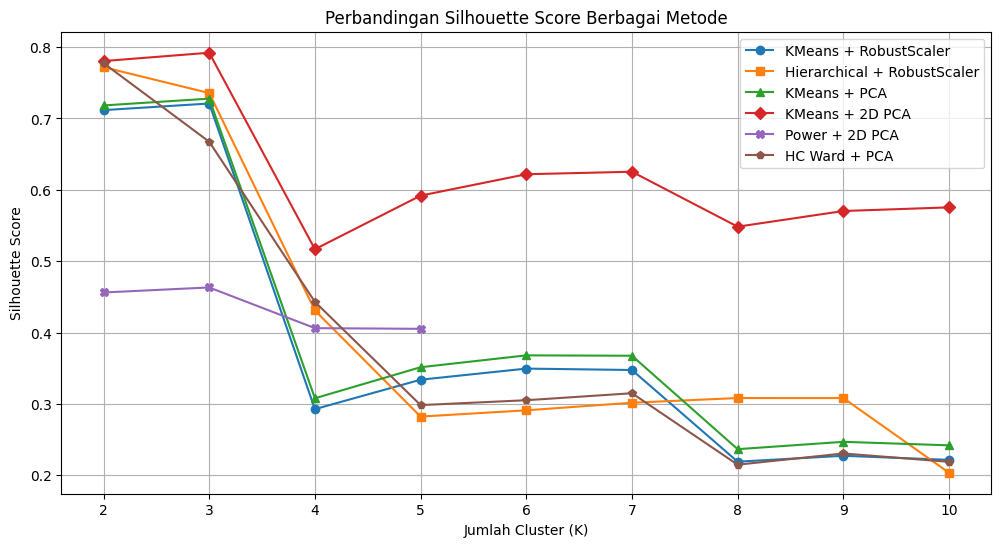


Metode terbaik: KMeans+2D_PCA dengan Silhouette Score = 0.7922

Model final: KMeans+2D PCA (k=3)
Silhouette Score final: 0.7922


In [ ]:
print("\n## b. Evaluasi Model Clustering")

# Visualisasi perbandingan silhouette score
plt.figure(figsize=(12, 6))
plt.plot(silhouette_values.keys(), silhouette_values.values(), 'o-', label='KMeans + RobustScaler')
plt.plot(silhouette_values_hc.keys(), silhouette_values_hc.values(), 's-', label='Hierarchical + RobustScaler')
plt.plot(silhouette_values_pca.keys(), silhouette_values_pca.values(), '^-', label='KMeans + PCA')
plt.plot(silhouette_values_2d.keys(), silhouette_values_2d.values(), 'D-', label='KMeans + 2D PCA')
plt.plot(silhouette_values_power.keys(), list(silhouette_values_power.values()), 'X-', label='Power + 2D PCA')

# Tambahkan nilai HC PCA secara terpisah karena key berbeda
hc_pca_k = [int(k.split('_')[0]) for k in silhouette_values_hc_pca.keys() if k.split('_')[1] == 'ward']
hc_pca_scores = [silhouette_values_hc_pca[f"{k}_ward"] for k in hc_pca_k]
plt.plot(hc_pca_k, hc_pca_scores, 'p-', label='HC Ward + PCA')

plt.xlabel('Jumlah Cluster (K)')
plt.ylabel('Silhouette Score')
plt.title('Perbandingan Silhouette Score Berbagai Metode')
plt.grid(True)
plt.legend()
plt.show()

# Menentukan model terbaik
all_scores = {
    'KMeans+RobustScaler': max(silhouette_values.values()),
    'Hierarchical+RobustScaler': max(silhouette_values_hc.values()),
    'KMeans+PCA': max(silhouette_values_pca.values()),
    'Hierarchical+PCA': max(silhouette_values_hc_pca.values()),
    'KMeans+2D_PCA': max(silhouette_values_2d.values()),
    'Power+2D_PCA': max(silhouette_values_power.values())
}

best_method = max(all_scores.items(), key=lambda x: x[1])
print(f"\nMetode terbaik: {best_method[0]} dengan Silhouette Score = {best_method[1]:.4f}")

# Identifikasi model terbaik - dari hasil yang Anda berikan, ini adalah KMeans+2D_PCA dengan k=3
best_k = 3  # Berdasarkan hasil yang Anda tunjukkan
best_score_2d = -1
best_labels_2d = None

for i in range(50):  # Even more initializations for final model
    kmeans_2d = KMeans(n_clusters=best_k, init='k-means++', n_init=50, max_iter=1000, random_state=42+i)
    labels_2d = kmeans_2d.fit_predict(X_pca_2d)
    score_2d = silhouette_score(X_pca_2d, labels_2d)

    if score_2d > best_score_2d:
        best_score_2d = score_2d
        best_labels_2d = labels_2d

final_labels = best_labels_2d
final_X = X_pca_2d
model_name = f"KMeans+2D PCA (k={best_k})"
final_silhouette = best_score_2d
print(f"\nModel final: {model_name}")
print(f"Silhouette Score final: {final_silhouette:.4f}")

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.


## c. Feature Selection
Melakukan feature selection untuk meningkatkan model clustering
Fitur yang dipilih untuk clustering (21): ['Average_Temperature_C', 'Total_Precipitation_mm_Log', 'CO2_Emissions_MT_Log', 'Temp_Precip_Ratio', 'Yield_Temp_Ratio', 'CO2_Temp_Ratio', 'Climate_Efficiency', 'Yield_per_CO2', 'EconomicImpact_per_CO2', 'Crop_Yield_MT_per_HA', 'Soil_Health_Index', 'Economic_Impact_Million_USD_Log', 'Temp_Squared', 'Soil_Health_Squared', 'Weather_Region_Norm', 'Region_Encoded', 'Crop_Type_Encoded', 'Adaptation_Strategies_Encoded', 'Temperature_Binned_Encoded', 'Precipitation_Binned_Encoded', 'Climate_Zone_Encoded']
K = 2, Silhouette Score setelah feature selection = 0.8052
K = 3, Silhouette Score setelah feature selection = 0.8170
K = 4, Silhouette Score setelah feature selection = 0.6350
K = 5, Silhouette Score setelah feature selection = 0.6437
K = 6, Silhouette Score setelah feature selection = 0.5643
K = 7, Silhouette Score setelah feature selection = 0.5810
K = 8, Silh

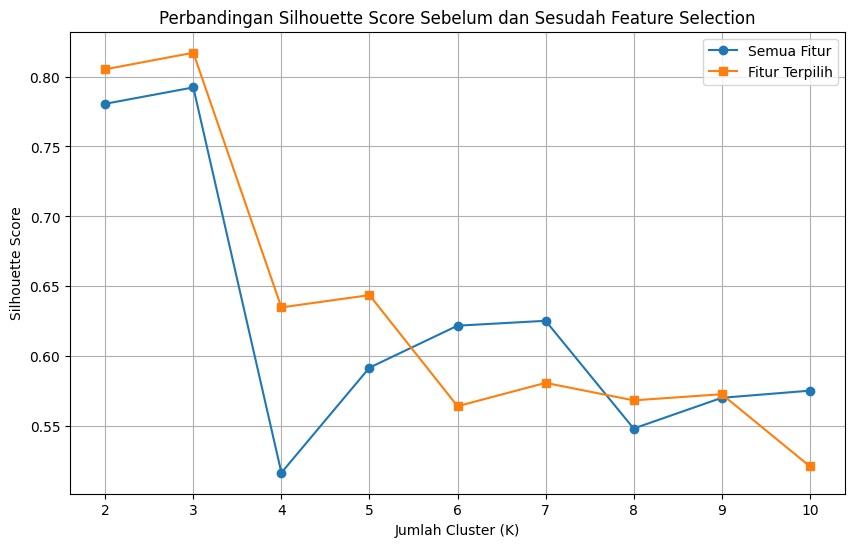


K optimal setelah feature selection: 3
Silhouette score optimal setelah feature selection: 0.8170

Model setelah feature selection lebih baik!
Model final: KMeans+2D PCA dengan feature selection (k=3)
Silhouette Score final: 0.8170


In [ ]:
print("\n## c. Feature Selection")

# Seleksi fitur untuk clustering
print("Melakukan feature selection untuk meningkatkan model clustering")

important_features = [
    # Fitur iklim dasar dan transformasi
    'Average_Temperature_C', 'Total_Precipitation_mm_Log', 'CO2_Emissions_MT_Log',

    # Rasio dan interaksi yang memberikan informasi tentang efisiensi
    'Temp_Precip_Ratio', 'Yield_Temp_Ratio', 'CO2_Temp_Ratio',
    'Climate_Efficiency', 'Yield_per_CO2', 'EconomicImpact_per_CO2',

    # Indikator pertanian
    'Crop_Yield_MT_per_HA', 'Soil_Health_Index', 'Economic_Impact_Million_USD_Log',

    # Squared features untuk nonlinearitas
    'Temp_Squared', 'Soil_Health_Squared',

    # Normalisasi regional
    'Weather_Region_Norm',

    # Kategorikal yang sudah diencoding
    'Region_Encoded', 'Crop_Type_Encoded', 'Adaptation_Strategies_Encoded',
    'Temperature_Binned_Encoded', 'Precipitation_Binned_Encoded', 'Climate_Zone_Encoded'
]

# Filter hanya kolom yang ada
X_features = [col for col in important_features if col in df_transformed.columns]
print(f"Fitur yang dipilih untuk clustering ({len(X_features)}): {X_features}")

# Persiapan data untuk clustering dengan fitur terpilih
X_selected = df_transformed[X_features].copy()
X_selected_scaled = scaler.fit_transform(X_selected)

# PCA 2D dengan fitur terpilih
X_selected_pca_2d = pca_2d.fit_transform(X_selected_scaled)

# Coba KMeans dengan fitur terpilih
silhouette_values_selected = {}
for k in range(2, 11):
    best_score_selected = -1
    best_labels_selected = None

    for i in range(20):
        kmeans_selected = KMeans(n_clusters=k, init='k-means++', n_init=50, max_iter=1000, random_state=42+i)
        labels_selected = kmeans_selected.fit_predict(X_selected_pca_2d)
        score_selected = silhouette_score(X_selected_pca_2d, labels_selected)

        if score_selected > best_score_selected:
            best_score_selected = score_selected
            best_labels_selected = labels_selected

    silhouette_values_selected[k] = best_score_selected
    print(f"K = {k}, Silhouette Score setelah feature selection = {best_score_selected:.4f}")

# Visualisasi perbandingan silhouette score sebelum dan sesudah feature selection
plt.figure(figsize=(10, 6))
plt.plot(silhouette_values_2d.keys(), silhouette_values_2d.values(), 'o-', label='Semua Fitur')
plt.plot(silhouette_values_selected.keys(), silhouette_values_selected.values(), 's-', label='Fitur Terpilih')
plt.xlabel('Jumlah Cluster (K)')
plt.ylabel('Silhouette Score')
plt.title('Perbandingan Silhouette Score Sebelum dan Sesudah Feature Selection')
plt.grid(True)
plt.legend()
plt.show()

# Temukan k optimal dengan fitur terpilih
best_k_selected = max(silhouette_values_selected.items(), key=lambda x: x[1])[0]
best_score_selected = silhouette_values_selected[best_k_selected]

print(f"\nK optimal setelah feature selection: {best_k_selected}")
print(f"Silhouette score optimal setelah feature selection: {best_score_selected:.4f}")

# Pilih model terbaik berdasarkan perbandingan
if best_score_selected > final_silhouette:
    print("\nModel setelah feature selection lebih baik!")

    # Re-run dengan k optimal untuk mendapatkan hasil final
    best_labels_selected = None
    best_score_final = -1

    for i in range(30):
        kmeans_final = KMeans(n_clusters=best_k_selected, init='k-means++', n_init=50, max_iter=1000, random_state=42+i)
        labels_final = kmeans_final.fit_predict(X_selected_pca_2d)
        score_final = silhouette_score(X_selected_pca_2d, labels_final)

        if score_final > best_score_final:
            best_score_final = score_final
            best_labels_selected = labels_final

    final_labels = best_labels_selected
    final_X = X_selected_pca_2d
    final_silhouette = best_score_final
    model_name = f"KMeans+2D PCA dengan feature selection (k={best_k_selected})"
    print(f"Model final: {model_name}")
    print(f"Silhouette Score final: {final_silhouette:.4f}")
else:
    print("\nModel dengan semua fitur lebih baik, mempertahankan model sebelumnya")
    print(f"Model final tetap: {model_name}")
    print(f"Silhouette Score final: {final_silhouette:.4f}")

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.


## d. Visualisasi Hasil Clustering


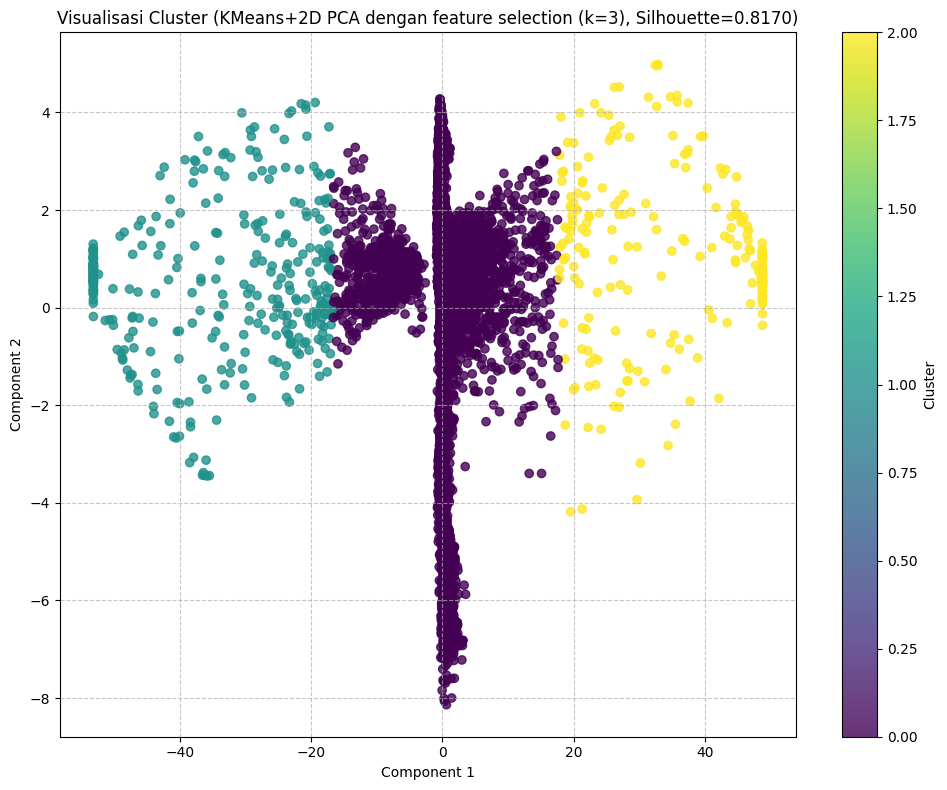

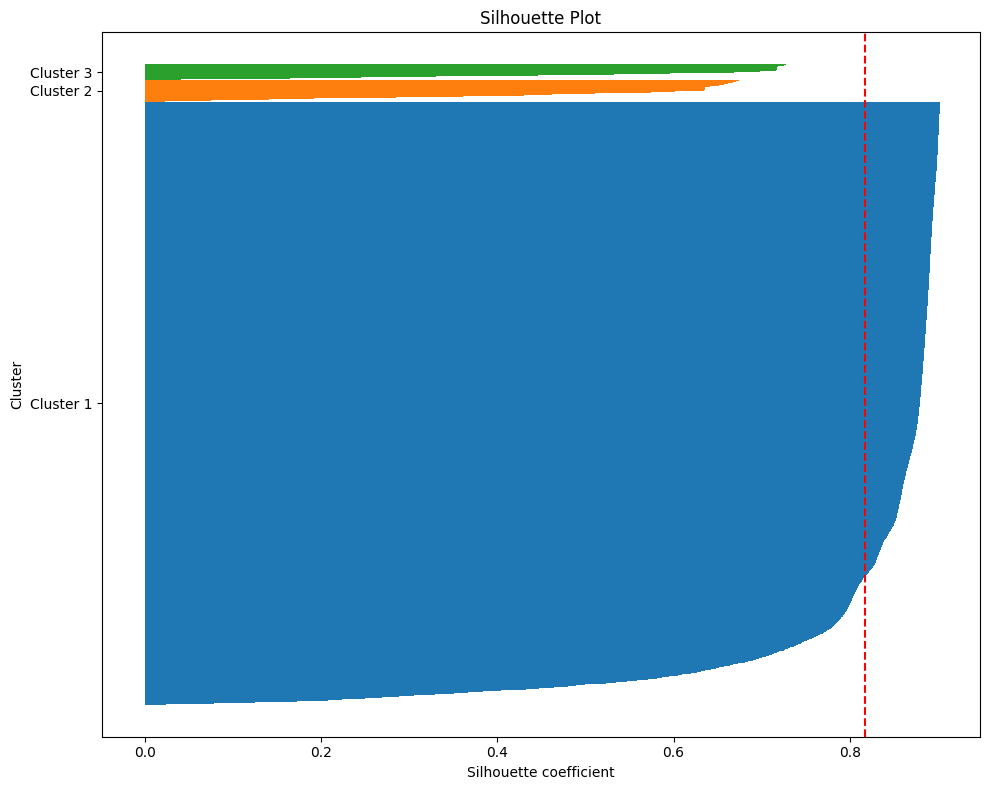

In [ ]:
print("\n## d. Visualisasi Hasil Clustering")

# Visualisasi cluster pada proyeksi 2D PCA
plt.figure(figsize=(10, 8))
scatter = plt.scatter(final_X[:, 0], final_X[:, 1], c=final_labels, cmap='viridis', alpha=0.8)
plt.colorbar(scatter, label='Cluster')
plt.title(f'Visualisasi Cluster ({model_name}, Silhouette={final_silhouette:.4f})')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Tambahkan silhouette plot untuk visualisasi kualitas cluster
plt.figure(figsize=(10, 8))
silhouette_vals = silhouette_samples(final_X, final_labels)

y_ticks = []
y_lower, y_upper = 0, 0

for i, cluster in enumerate(np.unique(final_labels)):
    cluster_silhouette_vals = silhouette_vals[final_labels == cluster]
    cluster_silhouette_vals.sort()

    y_upper += len(cluster_silhouette_vals)

    plt.barh(range(y_lower, y_upper), cluster_silhouette_vals, height=1.0, edgecolor='none')

    y_ticks.append((y_lower + y_upper) / 2)
    y_lower += len(cluster_silhouette_vals)

plt.axvline(x=final_silhouette, color='red', linestyle='--')
plt.yticks(y_ticks, [f'Cluster {i+1}' for i in range(len(np.unique(final_labels)))])
plt.xlabel('Silhouette coefficient')
plt.ylabel('Cluster')
plt.title('Silhouette Plot')
plt.tight_layout()
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```


## e. Analisis dan Interpretasi Hasil Cluster

Distribusi Cluster:
Cluster
0    9415
1     343
2     242
Name: count, dtype: int64


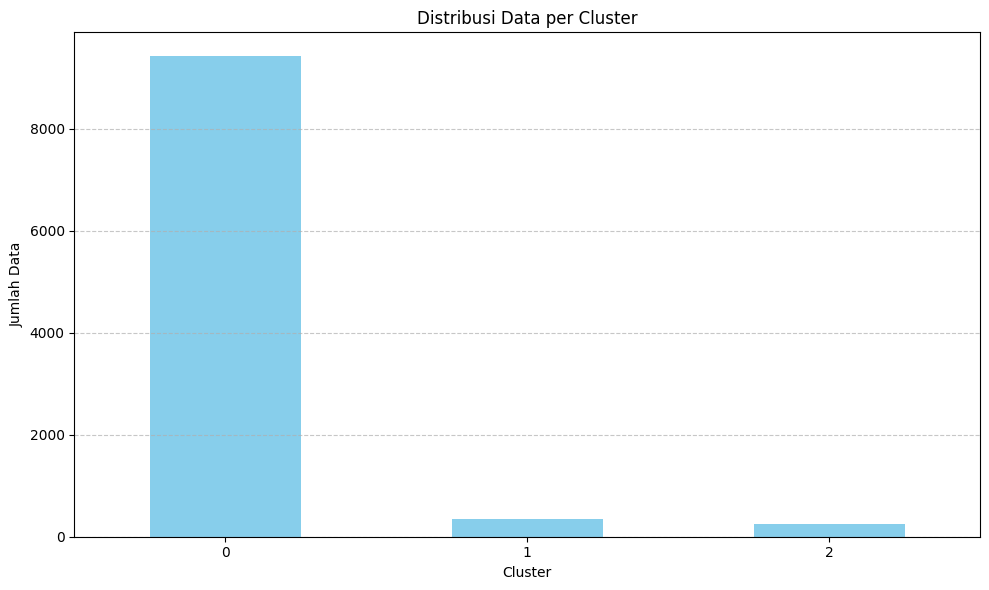

In [ ]:
print("\n## e. Analisis dan Interpretasi Hasil Cluster")

# Menambahkan hasil label cluster ke dataset asli
df_result = df_transformed.copy()
df_result['Cluster'] = final_labels

# Menghitung distribusi cluster
cluster_counts = df_result['Cluster'].value_counts().sort_index()
print("\nDistribusi Cluster:")
print(cluster_counts)

# Visualisasi distribusi cluster
plt.figure(figsize=(10, 6))
cluster_counts.plot(kind='bar', color='skyblue')
plt.title('Distribusi Data per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Jumlah Data')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [ ]:
# Interpretasi Target
print("\n### Interpretasi Target")
print("Data sudah dalam bentuk asli (tidak memerlukan inverse transform)")


### Interpretasi Target
Data sudah dalam bentuk asli (tidak memerlukan inverse transform)


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?


### Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia...

Statistik fitur numerik per cluster:
        Average_Temperature_C              Total_Precipitation_mm            \
                         mean   min    max                   mean       min   
Cluster                                                                       
0                   16.200004 -4.56  34.62            1617.153888  230.3446   
1                   -0.692245 -2.77  -0.01            1507.088677  230.3446   
2                    0.541570  0.01   2.14            1548.098350  230.3446   

                   CO2_Emissions_MT              Crop_Yield_MT_per_HA        \
               max             mean   min    max                 mean   min   
Cluster                                                                       
0        2975.9511        15.186157  0.77  29.73             2.271048  0.55   
1        2975.9511        15.963149  0.77  29.73             1.721703  0.55   
2        2975.95

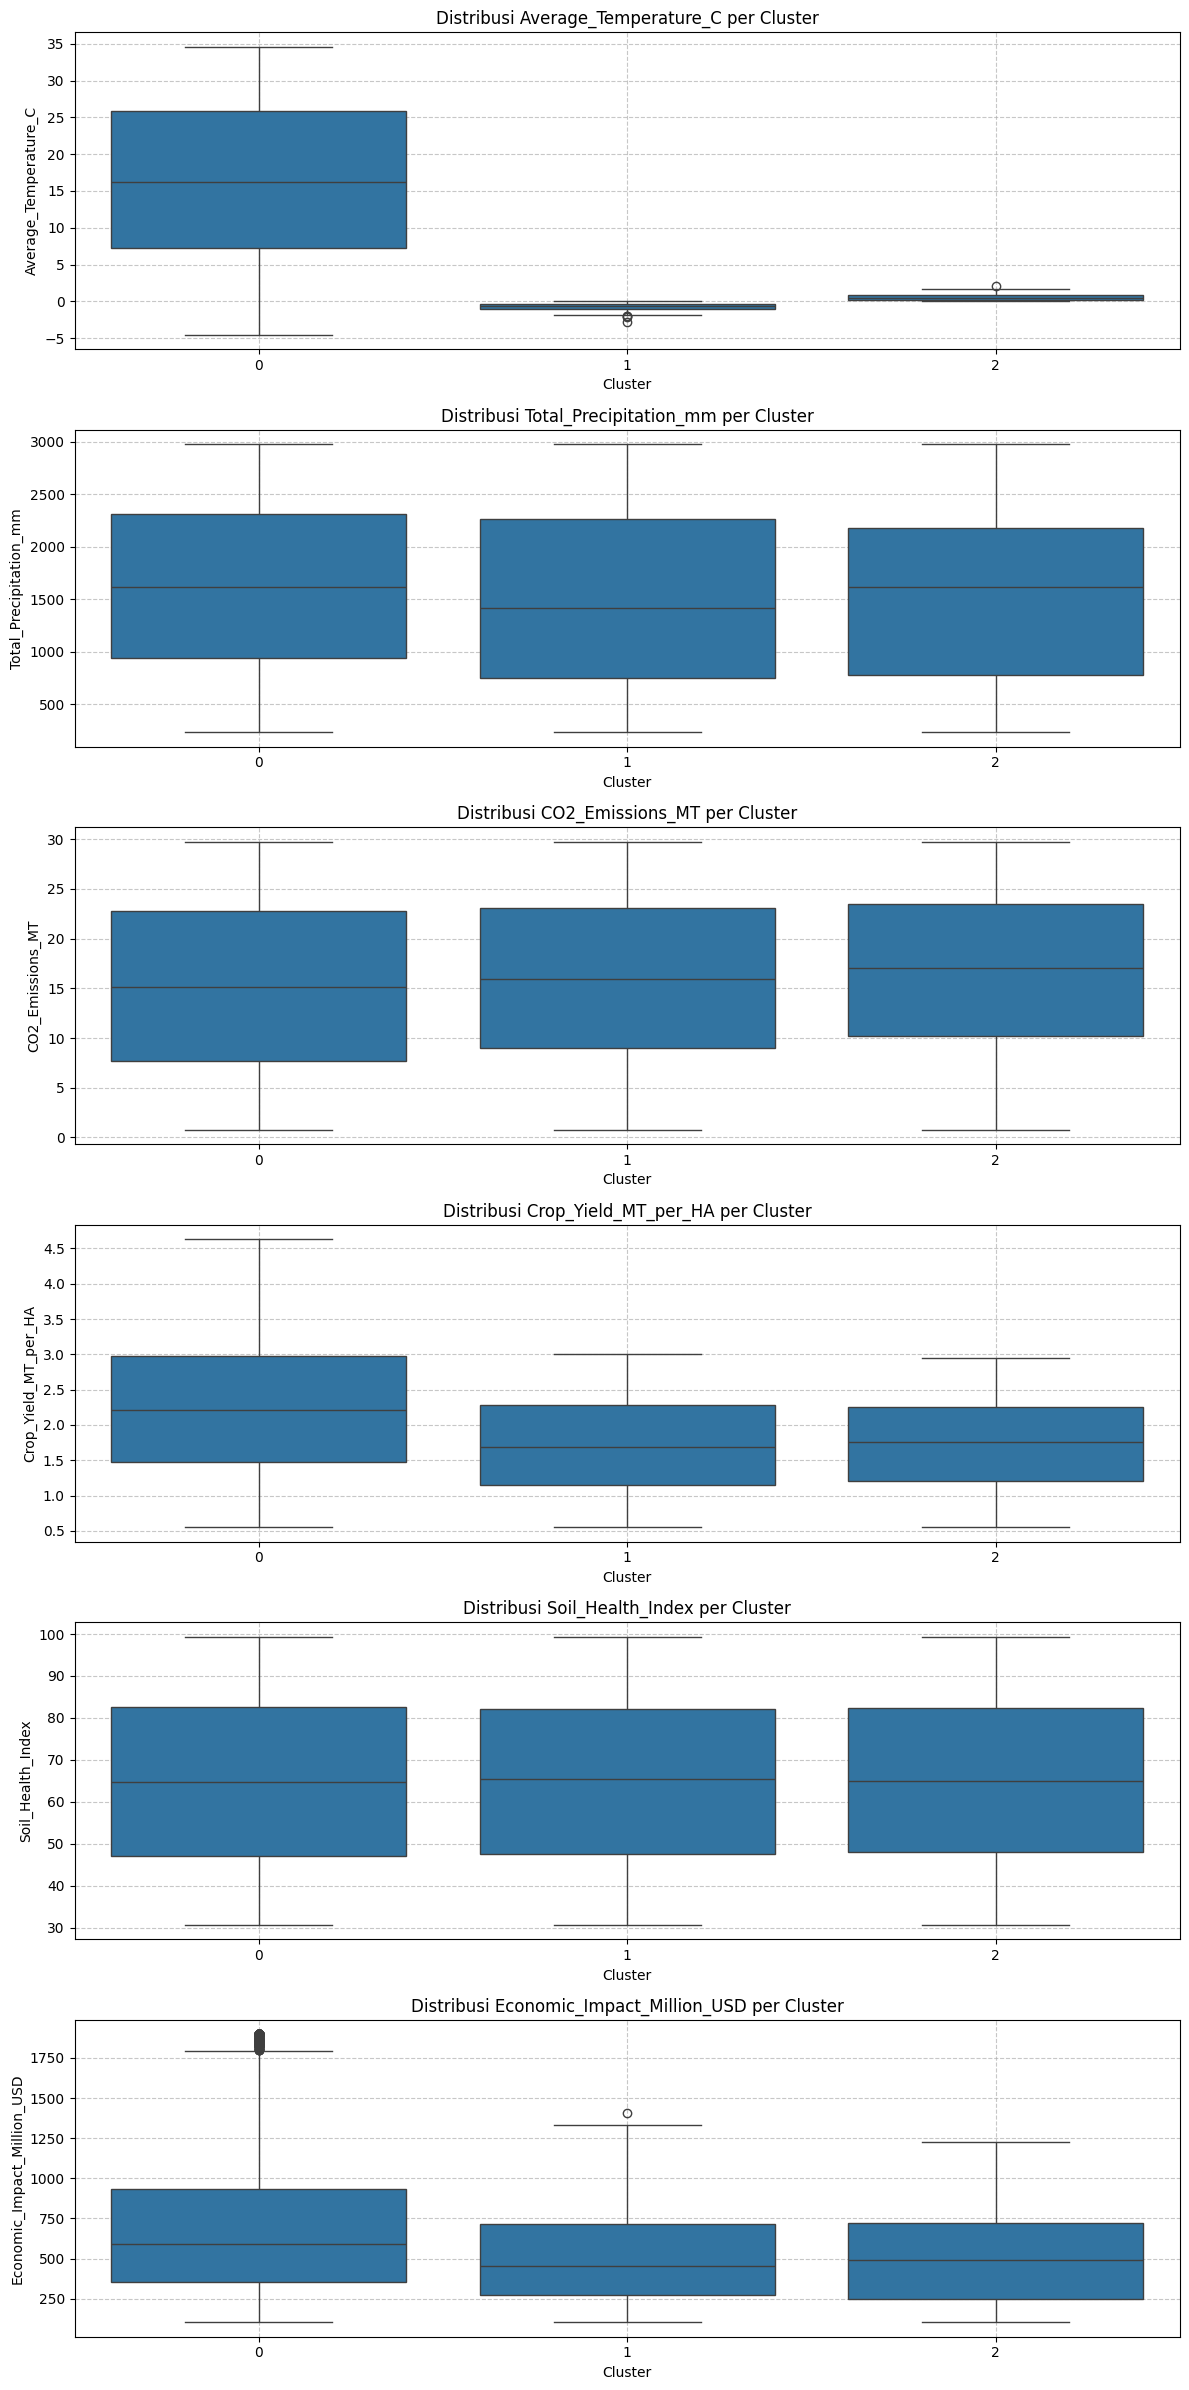


Modus fitur kategorikal per cluster:

Region:
Cluster 0: South
Cluster 1: Northeast
Cluster 2: North

Crop_Type:
Cluster 0: Wheat
Cluster 1: Barley
Cluster 2: Sugarcane

Adaptation_Strategies:
Cluster 0: Water Management
Cluster 1: Drought-resistant Crops
Cluster 2: Drought-resistant Crops


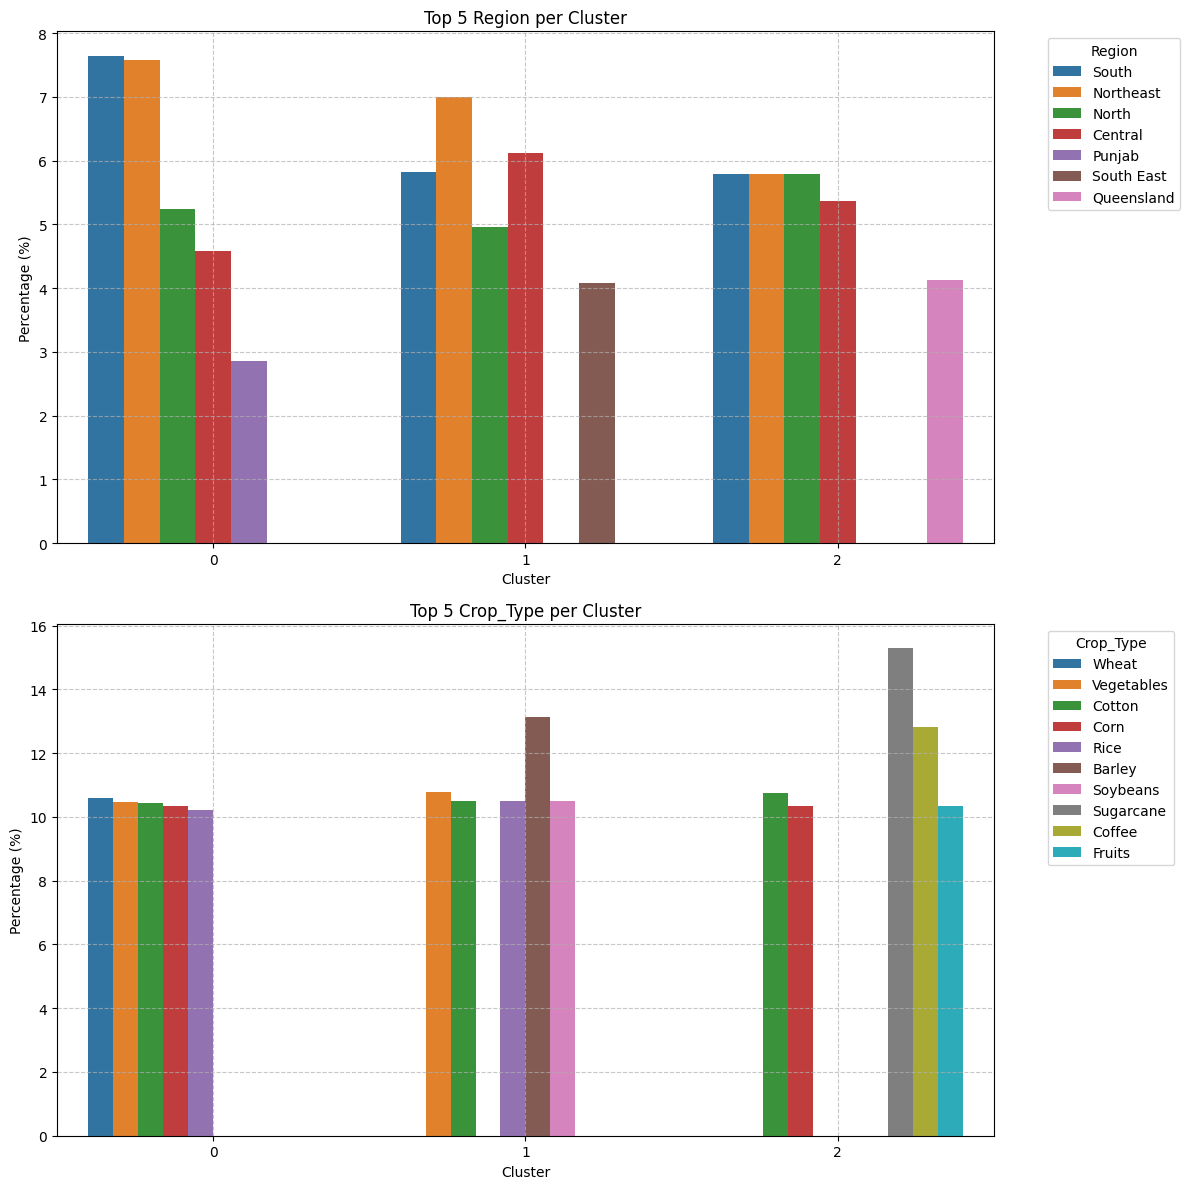

In [ ]:
# Analisis karakteristik tiap cluster
print("\n### Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia...")

# Pilih variabel penting untuk analisis
important_numeric = [
    'Average_Temperature_C',
    'Total_Precipitation_mm',
    'CO2_Emissions_MT',
    'Crop_Yield_MT_per_HA',
    'Soil_Health_Index',
    'Economic_Impact_Million_USD'
]

cluster_analysis = df_result.groupby('Cluster').agg({col: ['mean', 'min', 'max'] for col in important_numeric})
print("\nStatistik fitur numerik per cluster:")
print(cluster_analysis)

# Visualisasi karakteristik cluster
fig, axes = plt.subplots(len(important_numeric), 1, figsize=(12, 4*len(important_numeric)))

for i, feature in enumerate(important_numeric):
    sns.boxplot(x='Cluster', y=feature, data=df_result, ax=axes[i])
    axes[i].set_title(f'Distribusi {feature} per Cluster')
    axes[i].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Fungsi untuk menemukan modus untuk variabel kategorikal per cluster
def get_mode_per_cluster(df, column, cluster_col='Cluster'):
    result = {}
    for cluster in df[cluster_col].unique():
        cluster_data = df[df[cluster_col] == cluster]
        if len(cluster_data) > 0:
            mode_value = cluster_data[column].mode()[0]
            result[cluster] = mode_value
    return result

# Analisis modus untuk variabel kategorikal
print("\nModus fitur kategorikal per cluster:")
for col in ['Region', 'Crop_Type', 'Adaptation_Strategies']:
    modes = get_mode_per_cluster(df_result, col)
    print(f"\n{col}:")
    for cluster, mode in modes.items():
        print(f"Cluster {cluster}: {mode}")

# Visualisasi distribusi kategorikal (untuk Region dan Crop_Type)
fig, axes = plt.subplots(2, 1, figsize=(12, 12))

for i, col in enumerate(['Region', 'Crop_Type']):
    # Calculate percentage distribution
    cluster_cat_counts = pd.crosstab(df_result['Cluster'], df_result[col])
    cluster_cat_percentages = cluster_cat_counts.div(cluster_cat_counts.sum(axis=1), axis=0) * 100

    # Plot only top 5 categories per cluster for readability
    top_categories = {}
    for cluster in cluster_cat_percentages.index:
        top_categories[cluster] = cluster_cat_percentages.loc[cluster].nlargest(5).index.tolist()

    # Create a custom dataframe with only top categories
    plot_data = []
    for cluster in cluster_cat_percentages.index:
        for category in top_categories[cluster]:
            plot_data.append({
                'Cluster': cluster,
                col: category,
                'Percentage': cluster_cat_percentages.loc[cluster, category]
            })

    plot_df = pd.DataFrame(plot_data)

    # Plot
    sns.barplot(x='Cluster', y='Percentage', hue=col, data=plot_df, ax=axes[i])
    axes[i].set_title(f'Top 5 {col} per Cluster')
    axes[i].set_ylabel('Percentage (%)')
    axes[i].legend(title=col, bbox_to_anchor=(1.05, 1), loc='upper left')
    axes[i].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

Tulis hasil interpretasinya di sini.
1. Cluster 0:
 - **Rata-rata Suhu (°C)**: 16.20
 - **Total Presipitasi (mm)**: 1617.15
 - **Emisi CO2 (MT)**: 15.19
 - **Hasil Panen (MT/HA)**: 2.27
 - **Indeks Kesehatan Tanah**: 64.89
 - **Dampak Ekonomi (Juta USD)**: 682.63
 - **Wilayah Dominan**: South
 - **Jenis Tanaman Dominan**: Wheat
 - **Strategi Adaptasi Dominan**: Water Management
 - **Analisis**: Cluster ini mencerminkan daerah dengan suhu rata-rata lebih tinggi, curah hujan lebih tinggi, serta tingkat hasil panen yang lebih besar dibandingkan cluster lain. Wilayah ini didominasi oleh tanaman gandum dan strategi adaptasi utama yang digunakan adalah manajemen air untuk mengatasi tantangan iklim dan pertanian.

2. Cluster 1:
  - **Rata-rata Suhu (°C)**: -0.69
  - **Total Presipitasi (mm)**: 1507.09
  - **Emisi CO2 (MT)**: 15.96
  - **Hasil Panen (MT/HA)**: 1.72
  - **Indeks Kesehatan Tanah**: 65.01
  - **Dampak Ekonomi (Juta USD)**: 519.99
  - **Wilayah Dominan**: Northeast
  - **Jenis Tanaman Dominan**: Barley
  - **Strategi Adaptasi Dominan**: Drought-resistant Crops
  - **Analisis**: Cluster ini terdiri dari wilayah dengan suhu rata-rata yang lebih rendah dan hasil panen yang lebih kecil dibandingkan cluster lain. Tanaman utama di wilayah ini adalah barley, yang menunjukkan adaptasi terhadap lingkungan yang lebih dingin. Strategi adaptasi yang dominan adalah penggunaan tanaman tahan kekeringan, yang memungkinkan pertanian tetap produktif meskipun menghadapi tantangan cuaca ekstrem.

3. Cluster 2:
  - **Rata-rata Suhu (°C)**: 0.54
  - **Total Presipitasi (mm)**: 1548.10
  - **Emisi CO2 (MT)**: 16.58
  - **Hasil Panen (MT/HA)**: 1.70
  - **Indeks Kesehatan Tanah**: 64.99
  - **Dampak Ekonomi (Juta USD)**: 513.85
  - **Wilayah Dominan**: North
  - **Jenis Tanaman Dominan**: Sugarcane
  - **Strategi Adaptasi Dominan**: Drought-resistant Crops
  - **Analisis**: Cluster ini memiliki suhu yang sedikit lebih tinggi dibandingkan Cluster 1, dengan curah hujan yang relatif tinggi. Hasil panen dan dampak ekonomi di wilayah ini lebih rendah dibandingkan Cluster 0, tetapi memiliki tingkat emisi CO2 yang lebih tinggi. Tanaman utama di wilayah ini adalah tebu, dengan strategi adaptasi yang mirip dengan Cluster 1, yaitu penggunaan tanaman tahan kekeringan untuk meningkatkan ketahanan terhadap perubahan iklim.


# Contoh interpretasi [TEMPLATE]
# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
- **Rata-rata Annual Income (k$):** 48,260  
- **Rata-rata Spending Score (1-100):** 56.48  
- **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan menengah dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang moderat dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka.

## Cluster 2:
- **Rata-rata Annual Income (k$):** 86,540  
- **Rata-rata Spending Score (1-100):** 82.13  
- **Analisis:** Cluster ini menunjukkan pelanggan dengan pendapatan tahunan tinggi dan pengeluaran yang sangat tinggi. Pelanggan di cluster ini merupakan kelompok premium dengan daya beli yang kuat dan cenderung mengeluarkan uang dalam jumlah besar untuk produk atau layanan.

## Cluster 3:
- **Rata-rata Annual Income (k$):** 87,000  
- **Rata-rata Spending Score (1-100):** 18.63  
- **Analisis:** Cluster ini terdiri dari pelanggan dengan pendapatan tahunan yang tinggi tetapi pengeluaran yang rendah. Mereka mungkin memiliki kapasitas finansial yang baik namun tidak terlalu aktif dalam berbelanja. Ini bisa menunjukkan bahwa mereka lebih selektif dalam pengeluaran mereka atau mungkin lebih cenderung untuk menyimpan uang.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [ ]:
# Simpan hasil ke dalam file CSV
output_file = '/content/drive/MyDrive/dicoding/ML pemula/climate_agriculture_clustered_optimized.csv'
df_result.to_csv(output_file, index=False)
print(f"\nData hasil clustering telah disimpan ke '{output_file}'")


Data hasil clustering telah disimpan ke '/content/drive/MyDrive/dicoding/ML pemula/climate_agriculture_clustered_optimized.csv'
